# load evaluation functiosn 

In [9]:
import os
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import spacy
import en_core_web_sm
from scipy.stats import ttest_ind
import dill as pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tqdm import tqdm
import pandas as pd

In [2]:
def splitTolenWords(text, nwords):
    words = text.split(" ")
    count = int(len(words)/nwords)
    sentences = [" ".join(words[(i*nwords):((i+1)*nwords)]) for i in range(count)]
    return(sentences)

def unnameTextWithM(text):
    nlp = en_core_web_sm.load()
    doc = nlp(text)
    text = text
    for ent in reversed(doc.ents):
        text = text[:ent.start_char] + "<M>" + text[ent.end_char:] 
    return text

def bleu_scores(string, valid_data):
    valid = [i.split(" ") for i in valid_data]
    string = string.split(" ")[:100]
    bleu4 = sentence_bleu(valid, string ,weights = (0.25,0.25,0.25,0.25))
    return (bleu4)

def read_from_file(path):
    with open(path, 'r') as output_file:
        string = output_file.read()
    return string




In [3]:
pickle._dill._reverse_typemap['ClassType'] = type

objectRep = open("classifiers/POSclassifier4.obj", "rb")
POSclassiefier = pickle.load(objectRep)
objectRep.close()
 
objectRep = open("classifiers/Textclassifier.obj", "rb")
Textclassifier = pickle.load(objectRep)
objectRep.close()

Posclassifier = POSclassiefier()
Posclassifier.predict(["testing methos to predict something"])

def evaluate(genvalid, genstr):
    strM = unnameTextWithM(genstr)
    b4 = bleu_scores(strM, genvalid)
    Tscore = Textclassifier.predict_proba([strM])[0,1]
    Posscore= Posclassifier.predict([strM])[0,1]
    return (b4,Tscore,Posscore)

# load data 

In [4]:
with open("data_splits/trumpTestText.txt", encoding = "utf-8") as f:
    testset = splitTolenWords(unnameTextWithM(f.read()), 100)

# evaluate

In [12]:
results = []
path = "generators/GPT2_texts/test_texts/"
bar = tqdm(total = len(os.listdir(path[:-1])))
for filename in os.listdir(path[:-1]):
    filepath = path+filename
    genstr = read_from_file(filepath)
    evaluation = evaluate(testset, genstr)
    results.append(evaluation)
    bar.clear()
    bar.update(1)
res = pd.DataFrame(results)  

with open('generators/GPT2scores.obj', 'wb') as file:
    pickle.dump(res, file)

100%|██████████| 100/100 [01:12<00:00,  1.34it/s]

In [13]:
results = []
path = "generators/LSTM_texts/test_texts/"
bar = tqdm(total = len(os.listdir(path[:-1])))
for filename in os.listdir(path[:-1]):
    filepath = path+filename
    genstr = read_from_file(filepath)
    evaluation = evaluate(testset, genstr)
    results.append(evaluation)
    bar.clear()
    bar.update(1)
res = pd.DataFrame(results)  

with open('generators/LSTMscores.obj', 'wb') as file:
    pickle.dump(res, file)


100%|██████████| 100/100 [01:58<00:00,  1.19s/it]
C:\Users\marty\anaconda3\envs\tfgpunew\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\marty\anaconda3\envs\tfgpunew\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)

                                    
  1%|          | 1/100 [00:00<01:11,  1.39it/s]
                                            
  2%|▏         | 2/100 [00:01<01:07,  1.44it/s]
                                            
  3%|▎         | 3/10

                                             
 71%|███████   | 71/100 [00:54<00:23,  1.22it/s]
                                             
 72%|███████▏  | 72/100 [00:55<00:22,  1.25it/s]
                                             
 73%|███████▎  | 73/100 [00:55<00:21,  1.28it/s]
                                             
 74%|███████▍  | 74/100 [00:56<00:21,  1.22it/s]
                                             
 75%|███████▌  | 75/100 [00:57<00:20,  1.22it/s]
                                             
 76%|███████▌  | 76/100 [00:58<00:19,  1.24it/s]
                                             
 77%|███████▋  | 77/100 [00:59<00:17,  1.28it/s]
                                             
 78%|███████▊  | 78/100 [01:00<00:17,  1.25it/s]
                                             
 79%|███████▉  | 79/100 [01:00<00:15,  1.31it/s]
                                             
 80%|████████  | 80/100 [01:01<00:15,  1.33it/s]
                                             
 81%

In [14]:
results = []
path = "generators/Ngram_texts/test_texts/"
bar = tqdm(total = len(os.listdir(path[:-1])))
for filename in os.listdir(path[:-1]):
    filepath = path+filename
    genstr = read_from_file(filepath)
    evaluation = evaluate(testset, genstr)
    results.append(evaluation)
    bar.clear()
    bar.update(1)
res = pd.DataFrame(results)  

with open('generators/Ngramscores.obj', 'wb') as file:
    pickle.dump(res, file)

100%|██████████| 100/100 [01:20<00:00,  1.20it/s]

In [15]:
objectRep = open("generators/GPT2scores.obj", "rb")
GPT2scores = pickle.load(objectRep)
objectRep.close()

objectRep = open("generators/LSTMscores.obj", "rb")
LSTMscores = pickle.load(objectRep)
objectRep.close()

objectRep = open("generators/Ngramscores.obj", "rb")
Ngramscores = pickle.load(objectRep)
objectRep.close()

In [17]:
with open("data_splits/trumpClassifierText.txt", encoding = "utf-8") as f:
    trump_classifier_string = splitTolenWords(unnameTextWithM(f.read()),100)

with open("data_splits/othersClassifierText.txt", encoding = "utf-8") as f:
    others_words_string = splitTolenWords(unnameTextWithM(f.read()),100)
    
with open("data_splits/othersTestText.txt", encoding = "utf-8") as f:
    testsetfalse = splitTolenWords(unnameTextWithM(f.read()),100)
    
with open("data_splits/trumpTestText.txt", encoding = "utf-8") as f:
    testsettrue = splitTolenWords(unnameTextWithM(f.read()),100)

In [18]:
bleu_trump = [np.array(bleu_scores(genstr, testset)) for genstr in trump_classifier_string]
bleu_others = [np.array(bleu_scores(genstr, testset)) for genstr in others_words_string]
bleu_trump = np.array(bleu_trump)
bleu_others = np.array(bleu_others)

C:\Users\marty\anaconda3\envs\tfgpunew\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\marty\anaconda3\envs\tfgpunew\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [19]:
textclsTrue = Textclassifier.predict_proba(testsettrue)[:,1]
POSclsTrue = Posclassifier.predict(testsettrue)[:,1]
textclsFalse = Textclassifier.predict_proba(testsetfalse)[:,1]
POSclsFalse = Posclassifier.predict(testsetfalse)[:,1]

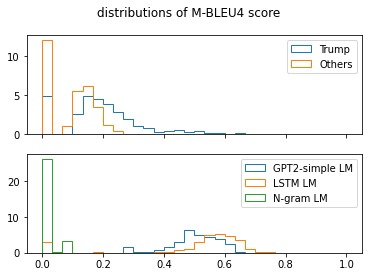

In [41]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, sharex=True)
fig.suptitle("distributions of M-BLEU4 score")

axs[0].hist(bleu_trump, range = (0,1), density = True, bins = 30, histtype = "step", label = "Trump")
axs[0].hist(bleu_others,range = (0,1), density = True, bins = 30, histtype = "step", label = "Others")
axs[1].hist(GPT2scores[0],range = (0,1), density = True, bins = 30, histtype = "step", label = "GPT2-simple LM")
axs[1].hist(LSTMscores[0],range = (0,1), density = True, bins = 30, histtype = "step", label = "LSTM LM")
axs[1].hist(Ngramscores[0],range = (0,1), density = True, bins = 30, histtype = "step", label = "N-gram LM")
axs[0].legend()
axs[1].legend()
plt.show()

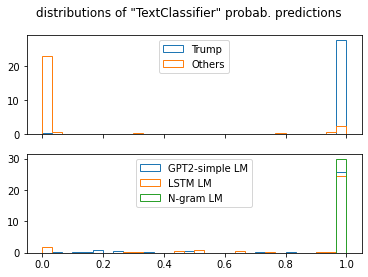

In [45]:
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('distributions of "TextClassifier" probab. predictions')

axs[0].hist(textclsTrue, range = (0,1), density = True, bins = 30, histtype = "step", label = "Trump")
axs[0].hist(textclsFalse,range = (0,1), density = True, bins = 30, histtype = "step", label = "Others")
axs[1].hist(GPT2scores[1],range = (0,1), density = True, bins = 30, histtype = "step", label = "GPT2-simple LM")
axs[1].hist(LSTMscores[1],range = (0,1), density = True, bins = 30, histtype = "step", label = "LSTM LM")
axs[1].hist(Ngramscores[1],range = (0,1), density = True, bins = 30, histtype = "step", label = "N-gram LM")
axs[0].legend(loc = 9)
axs[1].legend(loc = 9)
plt.show()

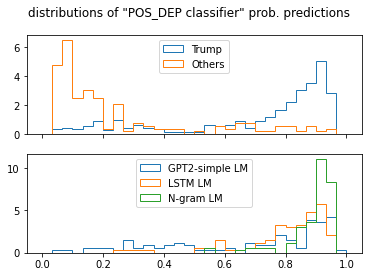

In [44]:
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('distributions of "POS_DEP classifier" prob. predictions')

axs[0].hist(POSclsTrue, range = (0,1), density = True, bins = 30, histtype = "step", label = "Trump")
axs[0].hist(POSclsFalse, range = (0,1), density = True, bins = 30, histtype = "step", label = "Others")
axs[1].hist(GPT2scores[2], range = (0,1), density = True, bins = 30, histtype = "step", label = "GPT2-simple LM")
axs[1].hist(LSTMscores[2], range = (0,1), density = True, bins = 30, histtype = "step", label = "LSTM LM")
axs[1].hist(Ngramscores[2], range = (0,1), density = True, bins = 30, histtype = "step", label = "N-gram LM")
axs[0].legend(loc = 9)
axs[1].legend(loc = 9)
plt.show()

In [36]:
from scipy.stats import mannwhitneyu
print("GPT2")
print(mannwhitneyu(GPT2scores[2], POSclsTrue)[1])
print(mannwhitneyu(GPT2scores[2], POSclsFalse)[1])
print("LSTM")
print(mannwhitneyu(LSTMscores[2], POSclsTrue)[1])
print(mannwhitneyu(LSTMscores[2], POSclsFalse)[1])
print("ngram")
print(mannwhitneyu(Ngramscores[2], POSclsTrue)[1])
print(mannwhitneyu(Ngramscores[2], POSclsFalse)[1])

GPT2
0.3194242106893276
4.3174981341773765e-24
LSTM
0.04887279512050876
5.318360550468359e-32
ngram
6.8218991304715456e-15
1.7074710703352028e-37


In [37]:
print("GPT2")
print(mannwhitneyu(GPT2scores[1], textclsTrue)[1])
print(mannwhitneyu(GPT2scores[1], textclsFalse)[1])

print("LSTM")
print(mannwhitneyu(LSTMscores[1], textclsTrue)[1])
print(mannwhitneyu(LSTMscores[1], textclsFalse)[1])

print("ngram")
print(mannwhitneyu(Ngramscores[1], textclsTrue)[1])
print(mannwhitneyu(Ngramscores[1], textclsFalse)[1])

GPT2
9.895290133143734e-06
2.7486956802536556e-36
LSTM
5.943789156515716e-05
2.2506275797818828e-33
ngram
0.4456711973816315
1.047614934077781e-40


In [38]:
print("GPT2")
print(mannwhitneyu(GPT2scores[0], bleu_trump)[1])
print(mannwhitneyu(GPT2scores[0], bleu_others)[1])

print("LSTM")
print(mannwhitneyu(LSTMscores[0], bleu_trump)[1])
print(mannwhitneyu(LSTMscores[0], bleu_others)[1])

print("ngram")
print(mannwhitneyu(Ngramscores[0], bleu_trump)[1])
print(mannwhitneyu(Ngramscores[0], bleu_others)[1])

GPT2
1.706310225532113e-47
3.909042570141976e-56
LSTM
2.1219043275953516e-31
1.7794451575216123e-35
ngram
4.847461352805996e-52
5.248266423201257e-45


In [39]:
from statistics import median

print(median(GPT2scores[0]))
print(median(LSTMscores[0]))
print(median(Ngramscores[0]))

print(median(GPT2scores[1]))
print(median(LSTMscores[1]))
print(median(Ngramscores[1]))

print(median(GPT2scores[2]))
print(median(LSTMscores[2]))
print(median(Ngramscores[2]))

print(median(bleu_trump))
print(median(bleu_others))

print(median(textclsTrue))
print(median(textclsFalse))

print(median(POSclsTrue))
print(median(POSclsFalse))


0.5045436936318646
0.5754241067739501
2.208018958275017e-78
0.9999920797479971
0.9999974314782263
0.9999998387575733
0.783763974905014
0.8454097807407379
0.9168563783168793
0.18581396466293398
0.11529961786961752
0.999999864663389
3.5379052441545675e-05
0.826636
0.1464737
